# Machine Learning: Regression

## 1. The dataset

### NYC Property Sales: A year's worth of properties sold on the NYC real estate market

The nyc-rolling-sales.csv.zip (2 Mb) is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period from September 2016 to September 2017. It contains the following features:

* **Borough: (N)** The name of the borough in which the property is located. A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
* **Neighborhood: (S)** Department of Finance assessors determine the neighborhood name in the course of valuing properties. The common name of the neighborhood is generally the same as the name Finance designates. However, there may be slight differences in neighborhood boundary lines and some sub-neighborhoods may not be included. 
* **Building Class Category: (S)** This is a field that we are including so that users of the Rolling Sales Files can easily identify similar properties by broad usage (e.g. One Family Homes) without looking up individual Building Classes. Files are sorted by Borough, Neighborhood, Building Class Category, Block and Lot.
* **Tax Class at Present: (N)** Every property in the city is assigned to one of four tax classes (Classes 1, 2, 3, and 4), based on the use of the property.
    * *Class 1:* Includes most residential property of up to three units (such as one-, two-, and three-family homes and small stores or offices with one or two attached apartments), vacant land that is zoned for residential use, and most condominiums that are not more than three stories.
     * *Class 2:* Includes all other property that is primarily residential, such as cooperatives and condominiums.
     * *Class 3:* Includes property with equipment owned by a gas, telephone or electric company.
     * *Class 4:* Includes all other properties not included in class 1,2, and 3, such as offices, factories, warehouses, garage buildings, etc.
* **Block: (N)** A Tax Block is a sub-division of the borough on which real properties are located. The Department of Finance uses a Borough-Block-Lot classification to label all real property in the City. “Whereas” addresses describe the street location of a property, the block and lot distinguishes one unit of real property from another, such as the different condominiums in a single building. Also, block and lots are not subject to name changes based on which side of the parcel the building puts its entrance on. 
* **Lot: (N)** A Tax Lot is a subdivision of a Tax Block and represents the property unique location. The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* **Easement: (S)** An easement is a right, such as a right of way, which allows an entity to make limited use of another’s real property. For example: MTA railroad tracks that run across a portion of another property. 
* **Building Class at Present: (S)** The Building Classification is used to describe a property’s constructive use. The first position of the Building Class is a letter that is used to describe a general class of properties (for example “A” signifies one-family homes, “O” signifies office buildings. “R” signifies condominiums). The second position, a number, adds more specific information about the property’s use or construction style (using our previous examples “A0” is a Cape Cod style one family home, “O4” is a tower type office building and “R5” is a commercial condominium unit). The term Building Class used by the Department of Finance is interchangeable with the term Building Code used by the Department of Buildings.
* **Address: (S)** The street address of the property as listed on the Sales File. Coop sales include the apartment number in the address field. 
* **Apartement Number (S)**
* **Zip Code: (N)** The property’s postal code 
* **Residential Units: (N)** The number of residential units at the listed property.
* **Commercial Units: (N)** The number of commercial units at the listed property.
* **Total Units: (N)** The total number of units at the listed property.
* **Land Square Feet: (N)** The land area of the property listed in square feet.
* **Gross Square Feet: (N)** The total area of all the floors of a building as measured from the exterior surfaces of the outside walls of the building, including the land area and space within any building or structure on the property. 
* **Year Built: (N)** Year the structure on the property was built. 
* **Tax Class at Time of Sale (N)**
* **Building Class at Time of Sale: (S)** 
* **Sales Price: (N)** Price paid for the property. A $0$ sale indicates that there was a transfer of ownership without a cash consideration. There can be a number of reasons for a $0$ sale including transfers of ownership from parents to children. 
* **Sale Date: (D)** Date the property sold.

Note: (N): number, (S): string, (D): date


## Work to do

* 1. Read the dataset

* 2. Clean the data

* 3. Select the target feature (selling price) and eliminate the item with 10 % ower value and the 10 % higher value

* 4. Select 3 features

* 5. Based on the various elements seen in the course, propose a model to predict the selling price based on three characteristics that you will have selected a priori.

* 6. Evaluate your model and comment it.

# Initial Data Understanding

In [3]:
import os
print(os.getcwd())
import pandas as pd
import matplotlib.pyplot as plt
nyc = pd.read_csv('nyc-rolling-sales.csv', delimiter = ',')
nyc.head()

C:\Users\Borja042\Desktop\MASTER2\PERIODO_2\DATA MINING\PROJECT\REG


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [2]:
nyc.describe(include = 'all')

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,84548.000000,84548.000000,84548,84548,84548,84548.000000,84548.000000,84548,84548,84548,...,84548.000000,84548.000000,84548.000000,84548,84548,84548.000000,84548.000000,84548,84548,84548
unique,NaN,NaN,254,47,11,NaN,NaN,1,167,67563,...,NaN,NaN,NaN,6062,5691,NaN,NaN,166,10008,364
top,NaN,NaN,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,NaN,NaN,,D4,131-05 40TH ROAD,...,NaN,NaN,NaN,-,-,NaN,NaN,R4,-,2017-06-29 00:00:00
freq,NaN,NaN,3068,18235,38633,NaN,NaN,84548,12663,210,...,NaN,NaN,NaN,26252,27612,NaN,NaN,12989,14561,544
mean,10344.359878,2.998758,NaN,NaN,NaN,4237.218976,376.224015,NaN,NaN,NaN,...,2.025264,0.193559,2.249184,NaN,NaN,1789.322976,1.657485,NaN,NaN,NaN
std,7151.779436,1.289790,NaN,NaN,NaN,3568.263407,658.136814,NaN,NaN,NaN,...,16.721037,8.713183,18.972584,NaN,NaN,537.344993,0.819341,NaN,NaN,NaN
min,4.000000,1.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN
25%,4231.000000,2.000000,NaN,NaN,NaN,1322.750000,22.000000,NaN,NaN,NaN,...,0.000000,0.000000,1.000000,NaN,NaN,1920.000000,1.000000,NaN,NaN,NaN
50%,8942.000000,3.000000,NaN,NaN,NaN,3311.000000,50.000000,NaN,NaN,NaN,...,1.000000,0.000000,1.000000,NaN,NaN,1940.000000,2.000000,NaN,NaN,NaN
75%,15987.250000,4.000000,NaN,NaN,NaN,6281.000000,1001.000000,NaN,NaN,NaN,...,2.000000,0.000000,2.000000,NaN,NaN,1965.000000,2.000000,NaN,NaN,NaN


In [3]:
nyc.dtypes

Unnamed: 0                         int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [4]:
# Value study of the target variable.
nyc['SALE PRICE'].unique()

array(['6625000', ' -  ', '3936272', ..., '408092', '11693337', '69300'],
      dtype=object)

We will first delete the columns that I do not consider important because that information is gathered in some other columns or the ones that are empty:

In [5]:
del nyc['APARTMENT NUMBER'], nyc['EASE-MENT'], nyc['SALE DATE'], nyc['ADDRESS']

As we can see, the target feature Sale Price is not considered a numerical columns. Lets fix the types of the columns.

In [6]:
fix_list_cat = ['BOROUGH','NEIGHBORHOOD','BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT',
                'ZIP CODE','BUILDING CLASS AT TIME OF SALE']
fix_list_num = ['LAND SQUARE FEET','TAX CLASS AT TIME OF SALE','GROSS SQUARE FEET','SALE PRICE']

print("BEFORE -->", nyc.dtypes)
for i in fix_list_cat:
    nyc[i] = nyc[i].astype('category')

for i in fix_list_num:
    nyc[i] = pd.to_numeric(nyc[i], errors='coerce')
    
print("AFTER--> ", nyc.dtypes)

BEFORE --> Unnamed: 0                         int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
BUILDING CLASS AT PRESENT         object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
dtype: object
AFTER-->  Unnamed: 0                           int64
BOROUGH                           category
NEIGHBORHOOD                      category
BUILDING CLASS CATEGORY           category
TAX CLASS AT PRESENT              category
BLOCK       

In [7]:
nyc['SALE PRICE'].unique()

array([ 6625000.,       nan,  3936272., ...,   408092., 11693337.,
          69300.])

After the transformation the values that had '-' have been turned to nans so let us delete them:

In [8]:
sum(nyc.duplicated(nyc.columns))

0

In [9]:
nyc.isna().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
dtype: int64

We need to clean all the nan values from the column to predict and then delete the values with a 10% lower and higher value:

In [10]:
nyc = nyc[nyc['SALE PRICE'].notnull()]

In [11]:
nyc['SALE PRICE'].isna().sum()

0

In [12]:
print("Number of rows to remove", 2*round(nyc.shape[0]/10), "Rows before removal", len(nyc))
clean = round(nyc.shape[0]/10)
nyc = nyc.sort_values('SALE PRICE', ascending = True).iloc[clean:(len(nyc)-clean)]
print("Rows After removal", len(nyc))

Number of rows to remove 13998 Rows before removal 69987
Rows After removal 55989


Let us check if the target variable behaves well:

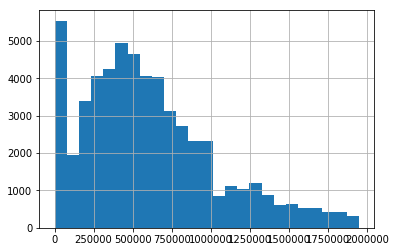

In [13]:
nyc['SALE PRICE'].hist(bins = 25)

array([1.950000e+06, 1.948832e+06, 1.945408e+06, ..., 2.000000e+00,
       1.000000e+00, 0.000000e+00])

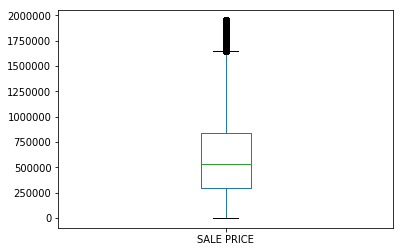

In [14]:
nyc['SALE PRICE'].plot.box()
nyc['SALE PRICE'].sort_values( ascending = False).unique()

As we have seen before we still have nans on the square feet columns. Since I will use problably for the model the Land Square Feet after looking at both definitions I will treate them because they represent a high percentage of our data so we can not really delete them. 

In [15]:
print(nyc.shape)
print(nyc.isna().sum())

(55989, 18)
Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  17436
GROSS SQUARE FEET                 17920
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
dtype: int64


When dealing with this kind of problems one could try to infer them with machine using the average, delete them... I will try to assing the mean value after some outlier removal.

Number of values before the cleaning 55989
Number of values after the cleaning 29464


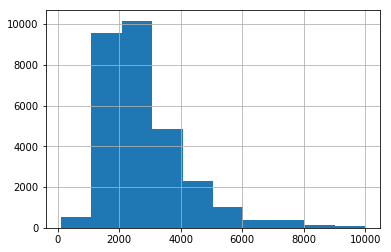

In [16]:
nyc['LAND SQUARE FEET'].sort_values(ascending = False)
values = nyc['LAND SQUARE FEET']
#nyc['LAND SQUARE FEET'].sort_values(ascending = False)
print("Number of values before the cleaning", len(values))
values = values[(values > 50) & (values < 10000)]
print("Number of values after the cleaning", len(values))
values.hist()

Note that with the histogram we can set the threshold and do visual outliers detection to check the most common values. I have set the down limit on 50 feet which is 15 meters and the upper on 10000 which is 3 Km. We neglected just a 28% of the values which is not bad.

In [17]:
mean_feet = values.mean()
print("Number of values after the cleaning", len(values), "Average value", mean_feet)

Number of values after the cleaning 29464 Average value 2904.0402185718162


In [18]:
# FILL values AND OUTLier REMOVAL
nyc['LAND SQUARE FEET']=nyc['LAND SQUARE FEET'].fillna(mean_feet)
print("BEFORE ", len(nyc))
nyc = nyc.loc[(nyc['LAND SQUARE FEET']> 50) & (nyc['LAND SQUARE FEET'] <10000) ,:]
print("AFTER", len(nyc))

BEFORE  55989
AFTER 46900


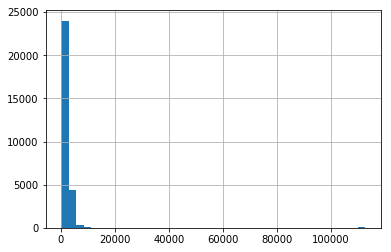

In [19]:
# Now, same with GROSS
values1 = nyc['GROSS SQUARE FEET'].sort_values()
values1.hist(bins = 40)

BEFORE  46900
AFTER 46288


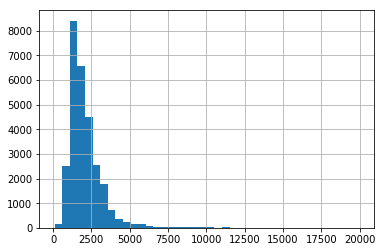

In [20]:
values1 = values1[(values1 > 50) & (values1 < 20000)]
values1.hist(bins = 40)
mean_feet1 = values1.mean()
nyc['GROSS SQUARE FEET']=nyc['GROSS SQUARE FEET'].fillna(mean_feet1)
print("BEFORE ", len(nyc))
nyc = nyc.loc[(nyc['GROSS SQUARE FEET']> 50) & (nyc['GROSS SQUARE FEET'] <20000) ,:]
print("AFTER", len(nyc))

Now, let us have a last check at the target variable. WE can see that there is a high amount of values surprinsingly small. They might be wrong or strange values

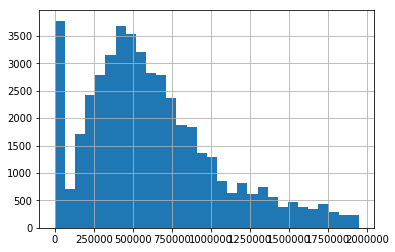

In [21]:
nyc["SALE PRICE"].hist(bins = 30)

In [22]:
nyc["SALE PRICE"].value_counts()

0.0          2182
10.0          669
450000.0      386
550000.0      371
600000.0      364
650000.0      353
700000.0      348
400000.0      346
750000.0      331
500000.0      309
800000.0      295
300000.0      292
350000.0      289
900000.0      288
850000.0      276
950000.0      272
1100000.0     266
1300000.0     247
1200000.0     247
250000.0      239
475000.0      235
425000.0      227
525000.0      225
325000.0      220
480000.0      217
460000.0      210
625000.0      196
530000.0      195
420000.0      195
1250000.0     194
             ... 
815415.0        1
456475.0        1
93750.0         1
515828.0        1
1631000.0       1
749950.0        1
881020.0        1
3774.0          1
650824.0        1
835090.0        1
585292.0        1
506029.0        1
684363.0        1
1106570.0       1
618800.0        1
309300.0        1
489255.0        1
522025.0        1
70980.0         1
941000.0        1
374911.0        1
342132.0        1
456500.0        1
1499500.0       1
440400.0  

Let's delete all the 0 and 1000 dollars deals. 

In [23]:
print("Rows AFTER processing SALE PRICE", len(nyc))
nyc = nyc.loc[(nyc['SALE PRICE']> 1000) ,:]
print("Rows AFTER processing SALE PRICE", len(nyc))

Rows AFTER processing SALE PRICE 46288
Rows AFTER processing SALE PRICE 43140


Rather Normal, let skewed and possitve courtosis


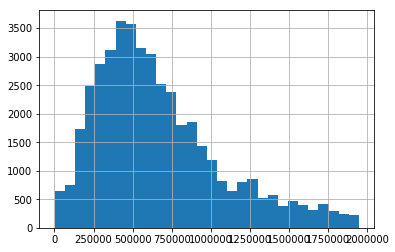

In [24]:
nyc["SALE PRICE"].hist(bins = 30)
print("Rather Normal, let skewed and possitve courtosis")

In [25]:
# ASUMPTIONS CHECKED
nyc["SALE PRICE"].kurtosis(), nyc["SALE PRICE"].skew()

(0.5737893301633634, 0.9806770350082733)

In [26]:
nyc.corr()

,Unnamed: 0,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
Unnamed: 0,1.000000,0.337277,-0.060950,-0.041922,0.003825,-0.000563,-0.047802,-0.068991,-0.012916,0.012386,-0.055241
BLOCK,0.337277,1.000000,-0.215538,0.129120,0.007237,0.020525,0.099547,-0.163527,0.087005,-0.350428,-0.255044
LOT,-0.060950,-0.215538,1.000000,-0.111010,-0.003477,-0.014120,-0.002414,0.017262,-0.283518,0.311446,0.163705
RESIDENTIAL UNITS,-0.041922,0.129120,-0.111010,1.000000,-0.003398,0.102368,-0.072124,0.454814,0.086415,-0.363367,0.190424
COMMERCIAL UNITS,0.003825,0.007237,-0.003477,-0.003398,1.000000,0.994351,0.000380,0.021864,0.001276,0.026568,-0.001813
TOTAL UNITS,-0.000563,0.020525,-0.014120,0.102368,0.994351,1.000000,-0.007338,0.070242,0.009727,-0.009625,0.018225
LAND SQUARE FEET,-0.047802,0.099547,-0.002414,-0.072124,0.000380,-0.007338,1.000000,0.106591,-0.015010,0.026091,0.063594
GROSS SQUARE FEET,-0.068991,-0.163527,0.017262,0.454814,0.021864,0.070242,0.106591,1.000000,-0.013482,0.264794,0.270735
YEAR BUILT,-0.012916,0.087005,-0.283518,0.086415,0.001276,0.009727,-0.015010,-0.013482,1.000000,-0.156962,-0.048547
TAX CLASS AT TIME OF SALE,0.012386,-0.350428,0.311446,-0.363367,0.026568,-0.009625,0.026091,0.264794,-0.156962,1.000000,0.082149


In [27]:
boro_hot_encoded = pd.get_dummies(nyc['BOROUGH'])
#boro_hot_encoded
nb_hot_encoded = pd.get_dummies(nyc['NEIGHBORHOOD'])
print(nyc.head())
nb_hot_encoded.head()


       Unnamed: 0 BOROUGH      NEIGHBORHOOD  \
79948        3814       5     MIDLAND BEACH   
7224         7228       1  MANHATTAN VALLEY   
83315        7181       5       TOTTENVILLE   
42802       17451       3         NAVY YARD   
79172        3038       5       GRYMES HILL   

                           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
79948  01 ONE FAMILY DWELLINGS                                        1   
7224   13 CONDOS - ELEVATOR APARTMENTS                                2   
83315  01 ONE FAMILY DWELLINGS                                        1   
42802  14 RENTALS - 4-10 UNIT                                        2A   
79172  02 TWO FAMILY DWELLINGS                                        1   

       BLOCK   LOT BUILDING CLASS AT PRESENT ZIP CODE  RESIDENTIAL UNITS  \
79948   3810    38                        A6    10306                  1   
7224    1844  1005                        R4    10025                  1   
83315   7899    39                    

,AIRPORT LA GUARDIA,ALPHABET CITY,ANNADALE,ARDEN HEIGHTS,ARROCHAR,ARROCHAR-SHORE ACRES,ARVERNE,ASTORIA,BATH BEACH,BATHGATE,...,WILLIAMSBURG-EAST,WILLIAMSBURG-NORTH,WILLIAMSBURG-SOUTH,WILLOWBROOK,WINDSOR TERRACE,WOODHAVEN,WOODLAWN,WOODROW,WOODSIDE,WYCKOFF HEIGHTS
79948,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
nyc_num = nyc.loc[:,["BLOCK","GROSS SQUARE FEET", "SALE PRICE"]]

In [29]:
ml1,ml2 = pd.concat([nyc_num, boro_hot_encoded] ,axis=1), pd.concat([nyc_num, nb_hot_encoded] ,axis=1)
print(ml1.head())

       BLOCK  GROSS SQUARE FEET  SALE PRICE  1  2  3  4  5
79948   3810         850.000000      1162.0  0  0  0  0  1
7224    1844        2091.093027      1175.0  1  0  0  0  0
83315   7899        1744.000000      1500.0  0  0  0  0  1
42802   2031        3760.000000      2000.0  0  0  1  0  0
79172    616        2280.000000      2000.0  0  0  0  0  1


## Dataset splitting.
We will perform a typical 75 - 25 splitting for our datasets to be used for both models.

In [30]:
y1 = ml1['SALE PRICE']
x1= ml1.drop('SALE PRICE', axis=1)
print(len(x1),len(y1))

43140 43140


In [31]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.25, random_state=101)
print(x1_train.shape, x1_test.shape,y1_train.shape, y1_test.shape)

(32355, 7) (10785, 7) (32355,) (10785,)


## Model train

In [32]:
%%time
from sklearn import linear_model
lr1 = linear_model.LinearRegression()
lr1.fit(x1_train, y1_train)


Wall time: 72.9 ms


## Linear Reg Model

In [33]:
%%time
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
y_pred = lr1.predict(x1_train)
print("Train mae: %.4f"% mean_absolute_error(y1_train, y_pred))
print("Train rmse: %.4f" % np.sqrt(mean_squared_error(y1_train, y_pred)))
print('Train R^2: %.2f' % r2_score(y1_train, y_pred))

Train mae: 272689.0811
Train rmse: 351644.2896
Train R^2: 0.23
Wall time: 6.94 ms


In [34]:
%%time
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
y_pred = lr1.predict(x1_test)
print("TEST MAE: %.4f"% mean_absolute_error(y1_test, y_pred))
print("TEST RMSE: %.4f" % np.sqrt(mean_squared_error(y1_test, y_pred)))
print('TEST R^2: %.2f' % r2_score(y1_test, y_pred))

TEST MAE: 274538.7106
TEST RMSE: 355642.2881
TEST R^2: 0.23
Wall time: 4.96 ms


### Linear Model Conclusions
As we can see, errors and $R^2$ coefficient are very similar from both train and test so we might be having a little bit of underfitting. This seems normal for me since we the model is quite similar as we are just using 3 features among the many we have. If we would use more features model would be complex and we could infer on overfitting problems. The $R^2$ coefficient tells us that little part of the variance is being explained and that the model is not too good. Also, we can see that the run time is longer for train set which is normal because it is 3 times more data.

## Deep Learning aproach.
Now that we have done the preprocessing and the linear model part, let's compare it with deep learning modelling. Since we are on a regression problem I will use  MLPRegressor. A multilayer perceptron (MLP) is a class of feedforward artificial neural network. A MLP consists of, at least, three layers of nodes: an input layer, a hidden layer and an output layer. MLPs are universal function approximators as showed by Cybenko's theorem, so they can be used to create mathematical models by regression analysis. It is highly recommendable to standardize the data before using this model.

In [35]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler()
transformer.fit(x1_train)
print("BEFORE--> ", "\n", x1_train[0:5], "\n")
Xd_train = transformer.transform(x1_train)
Xd_test = transformer.transform(x1_test)
print("AFTER-->", "\n", Xd_train[0:5])

BEFORE-->  
        BLOCK  GROSS SQUARE FEET  1  2  3  4  5
74719    177        2091.093027  0  0  0  1  0
67394   2983        2560.000000  0  0  0  1  0
69474   2086        2091.093027  0  0  0  1  0
74622    200        2482.000000  0  0  0  1  0
21347   2683        2340.000000  0  1  0  0  0 

AFTER--> 
 [[-1.17858684  0.064587   -0.54077933 -0.279986   -0.44609354  1.21252813
  -0.38697018]
 [-0.42801401  0.6365544  -0.54077933 -0.279986   -0.44609354  1.21252813
  -0.38697018]
 [-0.66795122  0.064587   -0.54077933 -0.279986   -0.44609354  1.21252813
  -0.38697018]
 [-1.1724346   0.54141089 -0.54077933 -0.279986   -0.44609354  1.21252813
  -0.38697018]
 [-0.50826057  0.3682009  -0.54077933  3.57160714 -0.44609354 -0.82472314
  -0.38697018]]


C:\Users\Borja042\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Borja042\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\Borja042\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


Since Neural Networks use many different parameters I am going to define some different architectures to check what happens. Eventhough some people define DNN as blackboxes it is possible to have some intuition on which parameters should be used but I am not that experienced yet despite the 2 little courses on DNN taken. 

As activation function I am going to use relu, since we are on a regresion problem so we should forget about tanh or sigmoid that are better suited for classification tasks. And for the solvers I will try both, The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better. For the L2 parameter (alpha : float, optional, default 0.0001 L2 penalty (regularization term) parameter) we will use the default value. We will also try some different parameters for max_iters and different hidden layers architectures always using a power of in case we would use a GPU for faster training.

In [36]:
%%time
from sklearn.neural_network import MLPRegressor
mlp11 = MLPRegressor(activation = 'relu', solver='adam', alpha=0.0001, hidden_layer_sizes=(32,32,32), max_iter=100)
mlp11.fit(Xd_train, y1_train)

Wall time: 15.2 s


C:\Users\Borja042\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [37]:
%%time
mlp12 = MLPRegressor(activation = 'relu', solver='lbfgs', alpha=0.0001, hidden_layer_sizes=(32,32,32), max_iter=100)
mlp12.fit(Xd_train, y1_train)

Wall time: 10.3 s


In [38]:
%%time
y_pred = mlp11.predict(Xd_test)
print("mae: %.4f"% mean_absolute_error(y1_test, y_pred))
print("rmse: %.4f" % np.sqrt(mean_squared_error(y1_test, y_pred)))
print('TEST R^2: %.2f' % r2_score(y1_test, y_pred))

mae: 269082.3646
rmse: 350988.6847
TEST R^2: 0.25
Wall time: 23.8 ms


In [39]:
%%time
y_pred = mlp12.predict(Xd_test)
print("mae: %.4f"% mean_absolute_error(y1_test, y_pred))
print("rmse: %.4f" % np.sqrt(mean_squared_error(y1_test, y_pred)))
print('TEST R^2: %.2f' % r2_score(y1_test, y_pred))

mae: 256668.8086
rmse: 338375.6292
TEST R^2: 0.30
Wall time: 14.4 ms


As we can see lbfgs seems to perform better and it works faster than adam method, since it is a stochastic method. Let us try somer complicated models now.

In [40]:
mlpf1 = MLPRegressor(activation = 'relu', solver='adam', alpha=0.0001, hidden_layer_sizes=(32,64,32), max_iter=100)
mlpf2 = MLPRegressor(activation = 'relu', solver='adam', alpha=0.0001, hidden_layer_sizes=(32,64,128,64,32), max_iter=200)
mlpf3 = MLPRegressor(activation = 'relu', solver='adam', alpha=0.0001, hidden_layer_sizes=(64,128,256,128,64), max_iter=400)
mlpf4 = MLPRegressor(activation = 'relu', solver='adam', alpha=0.0001, hidden_layer_sizes=(64,128,256,512,256,128,64), max_iter=700)
models = [mlpf1, mlpf2, mlpf3, mlpf4]

In [41]:
import time
for arch in models:
    print("------")
    print("New model --> ")
    t0 = time.time()
    arch.fit(Xd_train, y1_train)
    y_pred = arch.predict(Xd_test)
    print("mae: %.4f"% mean_absolute_error(y1_test, y_pred))
    print("rmse: %.4f" % np.sqrt(mean_squared_error(y1_test, y_pred)))
    print('TEST R^2: %.2f' % r2_score(y1_test, y_pred))  
    t1 = time.time()
    total = t1-t0
    print("Elapsed time for ", arch, " ==> ", total)
    

------
New model --> 


C:\Users\Borja042\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mae: 267883.4971
rmse: 349871.7868
TEST R^2: 0.26
Elapsed time for  MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(32, 64, 32), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)  ==>  16.914088487625122
------
New model --> 


C:\Users\Borja042\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mae: 245326.3303
rmse: 330060.2343
TEST R^2: 0.34
Elapsed time for  MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(32, 64, 128, 64, 32), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)  ==>  185.95676493644714
------
New model --> 
mae: 224998.9930
rmse: 311964.9818
TEST R^2: 0.41
Elapsed time for  MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(64, 128, 256, 128, 64),
       learning_rate='constant', learning_rate_init=0.001, max_iter=400,
       momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
       power_t=0.5, ra

### Deep Learning Conclusions

We can see that we have built 4 differents architectures and that the results are better when we increment the complexity of the model, as so it increases the execution time. It is possible to infer that looking at the two best models the performance may saturate so it is not worth it to make more complicate architectures because the gain on the error will not be that high considering the execution time. I think that if I would be able to run them on a GPU the execution time would be super decreased and by that way it would be worth to test and use more different and complex architectures. When performing deep learning models to need to control the overfitting as they tend to overfit, which is a common and known issue of deep learning.


## Final Results and conclussions.

Looking at the results, we have improved A LOT the performance with just those 3 variables using Deep Learning with the MLPRegressor compared with the Linear Model.  If we look at the best DL model we have built we can see that we have reduced the Mean Absolute Error by a 20 % and that we almost have a two times better $R^2$ coefficient so the deep learning model explains two times better the total variance of the dataset. Also, we need to take into account the execution times, from a few miliseconds the linear regression to 15 minutes for the best DL model and that is a humoungous difference. But still, the gaining on the error is worth to try deep learning techniques although they are way more complex. 

Also it is clear that the hyperparameters of the Deep Learning approach are harder to understand and to control that the ones on Linear Regression models but I believe that if we could use all the features even with a Linear Regression we could build a better and more accurate model so it is important to understand well and to try both approaches.
